# Image Classification
In this project, you'll classify images of your own. Make sure you have read PreprocessData.ipynb to structure your data.  You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.


## Explore the Data
The dataset is processed and written in a data.pkl file. If you haven't done this step I request you to follow PreprocessData.ipynb as it is mandatory to proceed further. The data set will be labelled as per the folder structure. The indexes will start from 0 - n (depending on the number of folders)

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `sample_id`. The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.

Samples: 20651
Label Counts: {0: 2747, 1: 3104, 2: 3359, 3: 3474, 4: 1926, 5: 3312, 6: 2729}
First 20 Labels: [1 5 0 1 0 5 1 6 2 0 3 6 3 5 4 2 1 6 6 0]
sample label 3

Example of Image 100:
Image - Min Value: 0 Max Value: 255
Image - Shape: (69, 69, 3)
Label - Label Id: 3 Name: carrot


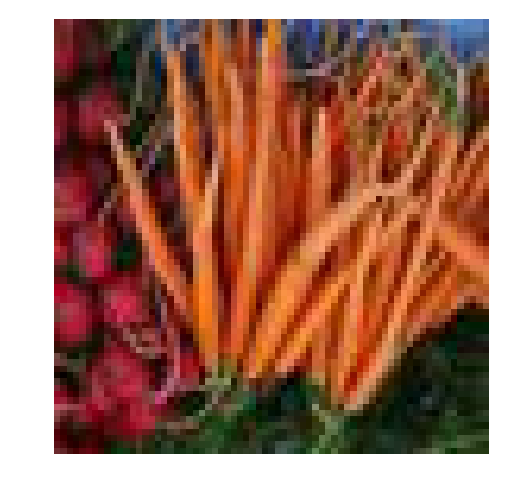

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#cifar10_dataset_folder_path = 'cifar-10-batches-py'
import helper
import numpy as np

import problem_unittests as tests

# Explore the dataset
batch_id = 5
sample_id = 100
helper.display_stats(sample_id)

In [2]:
#  import pickle
# # with open(cifar100_dataset_folder_path+"/meta", 'rb') as fo:
# #     dict = pickle.load(fo, encoding='latin')
# # print(dict['fine_label_names'])
# with open(cifar100_dataset_folder_path + '/train', mode='rb') as file:
#         batch = pickle.load(file, encoding='latin1')

# features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
# print(len(batch['fine_labels']))
# #print(batch)
# #print(batch)

In [3]:
# # print(len(dict[b'fine_labels']))
# import pickle
# with open(cifar100_dataset_folder_path+"/meta", 'rb') as fo:
#     dict = pickle.load(fo, encoding='latin')
# print(dict['fine_label_names'])

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [7]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    #x = np.divide(x,np.max(x, axis=0))
    return x/np.max(x, axis=0)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [8]:
from sklearn.preprocessing import OneHotEncoder
test_for_10 = True

In [9]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    #print(x)
    oneHot = None
    if test_for_10:
        oneHot = np.zeros((len(x), 10))
    else:
        oneHot = np.zeros((len(x), 7))
    for idx, v in enumerate(x):
        oneHot[idx][v] = 1
    return oneHot


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
test_for_10 = False;
helper.preprocess_and_save_data(None, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation_model.p', mode='rb'))
test_for_10 = True

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [12]:
import tensorflow as tf
import numpy as np

In [13]:

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    print(image_shape)
    return tf.placeholder(tf.float32, shape=[None, image_shape[0], image_shape[1], image_shape[2]], name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=[None, n_classes], name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

(32, 32, 3)
Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [14]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    #shape = [filter_size, filter_size, num_input_channels, num_filters]
    
    num_input_channels = x_tensor.shape.as_list()[3]
    num_filters = conv_num_outputs
    print("x_tensor shape: {} conv_num_outpus: {} conv_ksize: {}\
            conv_strides: {} pool_ksize: {} pool_strides: {}".format(x_tensor.shape, conv_num_outputs,
                                                                      conv_ksize, conv_strides, pool_ksize, pool_strides)) 
    
    shape = [conv_ksize[0], conv_ksize[1], num_input_channels, num_filters]
    print("shape: ",shape)
    weight = tf.Variable(tf.truncated_normal(shape, mean=0, stddev=0.06))
    #weight = tf.Variable(tf.truncated_normal(shape, mean=0, stddev=1e-1))
    #weight = tf.Variable(np.random.rand(num_input_channels+num_filters) * np.sqrt(2/(num_input_channels+num_filters)))
    #weights = tf.Variable(np.random.randn(num_outputs) * sqrt(2.0/num_outputs))
    #bias = tf.Variable(tf.constant(0.05, shape=[num_filters]))
    bias = tf.Variable(tf.zeros(num_filters))
    conv = tf.nn.conv2d(x_tensor, weight, strides=[1,conv_strides[0], conv_strides[1],1], padding='SAME')
    conv = tf.nn.bias_add(conv, bias)
    conv = tf.nn.relu(conv)
    if pool_ksize[0] == 1:
        return conv
    else:
        return tf.nn.max_pool(conv, ksize=[1,pool_ksize[0],pool_ksize[1],1], 
                      strides=[1,pool_strides[0], pool_strides[1], 1],
                      padding='SAME')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

x_tensor shape: (?, 32, 32, 5) conv_num_outpus: 10 conv_ksize: (2, 2)            conv_strides: (4, 4) pool_ksize: (2, 2) pool_strides: (2, 2)
shape:  [2, 2, 5, 10]
Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [15]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    #print(x_tensor)
    shape = x_tensor.get_shape()
    num_features = shape[1:4].num_elements()
    layer_flat = tf.reshape(x_tensor, [-1, num_features])
    print("shape: {} num_feautres: {}".format(shape, layer_flat.get_shape().as_list()[1]))
    return layer_flat


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

shape: (?, 10, 30, 6) num_feautres: 1800
Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [16]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    print(x_tensor.get_shape())
    weights = tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[1], num_outputs], mean=0.0, stddev=0.06))
    #weights = tf.Variable(np.random.randn(num_outputs) * sqrt(2.0/num_outputs))
    #bias = tf.Variable(tf.constant(0.05, shape=[num_outputs]))
    bias = tf.Variable(tf.zeros(num_outputs))
    #tf.Variable(tf.zeros(num_outputs))
    fc = tf.matmul(x_tensor, weights) + bias
    return tf.nn.relu(fc)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

(?, 128)
Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [17]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    weights = tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[1], num_outputs],mean=0.0,stddev=0.06))
    #weights = tf.Variable(np.random.randn(num_outputs) * sqrt(2.0/num_outputs))
    #bias = tf.Variable(tf.constant(0.05, shape=[num_outputs]))
    bias = tf.Variable(tf.zeros(num_outputs))
    out = tf.add(tf.matmul(x_tensor, weights),bias)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Creating Convolutional Model

![A 7 Layer Covnet](./arch.png)

In [34]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    conv0 = conv2d_maxpool(x, 128, [5,5], [2,2], [3,3], [2,2])
    conv0 = tf.nn.dropout(conv0, keep_prob)
    conv1 = conv2d_maxpool(conv0, 128, [3,3], [1,1], [2,2], [2,2])
    conv1 = tf.nn.dropout(conv1, keep_prob)
    conv2 = conv2d_maxpool(conv1, 256, [3,3], [1,1], [2,2], [2,2])
    conv2 = tf.nn.dropout(conv2, keep_prob)
    fl1=flatten(conv2)
    fc1 = fully_conn(fl1,100)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    fc2 = fully_conn(fc1,50)
    out = output(fc2,7)
    return out
    



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((69, 69, 3))
if test_for_10:
    y = neural_net_label_input(7)
else: 
    y = neural_net_label_input(7)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')


tests.test_conv_net(conv_net)




(69, 69, 3)
x_tensor shape: (?, 69, 69, 3) conv_num_outpus: 128 conv_ksize: [5, 5]            conv_strides: [2, 2] pool_ksize: [3, 3] pool_strides: [2, 2]
shape:  [5, 5, 3, 128]
x_tensor shape: (?, 18, 18, 128) conv_num_outpus: 128 conv_ksize: [3, 3]            conv_strides: [1, 1] pool_ksize: [2, 2] pool_strides: [2, 2]
shape:  [3, 3, 128, 128]
x_tensor shape: (?, 9, 9, 128) conv_num_outpus: 256 conv_ksize: [3, 3]            conv_strides: [1, 1] pool_ksize: [2, 2] pool_strides: [2, 2]
shape:  [3, 3, 128, 256]
shape: (?, 5, 5, 256) num_feautres: 6400
fl1:  Tensor("Reshape:0", shape=(?, 6400), dtype=float32)  :  6400
(?, 6400)
(?, 100)
x_tensor shape: (?, 224, 224, 7) conv_num_outpus: 128 conv_ksize: [5, 5]            conv_strides: [2, 2] pool_ksize: [3, 3] pool_strides: [2, 2]
shape:  [5, 5, 7, 128]
x_tensor shape: (?, 56, 56, 128) conv_num_outpus: 128 conv_ksize: [3, 3]            conv_strides: [1, 1] pool_ksize: [2, 2] pool_strides: [2, 2]
shape:  [3, 3, 128, 128]
x_tensor shape: (?,

## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [35]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={
        x: feature_batch,
        y : label_batch,
        keep_prob : keep_probability
    })


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


In [36]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict={
        x : feature_batch,
        y : label_batch,
        keep_prob: 1.0
    })
    # Set batch size if not already set
    try:
        if batch_size:
            pass
    except NameError:
        batch_size = 64
    epoch = 0
    val_acc = 0.0
    for batch_features, batch_labels in helper.preprocess_validation_batch(batch_size):
        validation_accuracy = sess.run(accuracy, feed_dict={
            x: batch_features,
            y: batch_labels,
            keep_prob: 1.0
        })
        val_acc += validation_accuracy
        epoch += 1
    val_acc /= epoch
    print('Loss: {:>10.4f} Accuracy: {:.6f}'.format(loss,val_acc))
    

In [37]:
#  # Set batch size if not already set
# try:
#     if batch_size:
#         pass
# except NameError:
#     batch_size = 128
# epoch = 0
# print(batch_size)
# total = 0
# for batch_features, batch_labels in helper.preprocess_validation_batch(batch_size):
#     #print('batch: ',len(batch_features), ' epoch: ',epoch)
#     total += len(batch_features)
#     epoch += 1
print('total data: ',total, 'Epoch: ',epoch)

128
total data:  2065 Epoch:  17


### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [38]:
# TODO: Tune Parameters
epochs = 100
batch_size = 128
keep_probability = 0.5
test_for_10 = False

### Train on a full data CIFAR-100 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. 
This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [39]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification_07_model'
test_for_10 = False
print('Checking the Training full data...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        n_batches = 2
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_model(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            if (epoch % 5) == 0:
                saver = tf.train.Saver()
                save_path = saver.save(sess, save_model_path)

Checking the Training full data...
Epoch  1, CIFAR-10 Batch 1:  Loss:     1.8506 Accuracy: 0.241979
Epoch  1, CIFAR-10 Batch 2:  Loss:     1.7454 Accuracy: 0.301192
Epoch  2, CIFAR-10 Batch 1:  Loss:     1.6401 Accuracy: 0.389622
Epoch  2, CIFAR-10 Batch 2:  Loss:     1.5554 Accuracy: 0.437194
Epoch  3, CIFAR-10 Batch 1:  Loss:     1.5296 Accuracy: 0.452457
Epoch  3, CIFAR-10 Batch 2:  Loss:     1.4065 Accuracy: 0.456607
Epoch  4, CIFAR-10 Batch 1:  Loss:     1.4204 Accuracy: 0.485963
Epoch  4, CIFAR-10 Batch 2:  Loss:     1.3246 Accuracy: 0.503008
Epoch  5, CIFAR-10 Batch 1:  Loss:     1.3646 Accuracy: 0.490809
Epoch  5, CIFAR-10 Batch 2:  Loss:     1.2702 Accuracy: 0.533562
Epoch  6, CIFAR-10 Batch 1:  Loss:     1.3307 Accuracy: 0.536068
Epoch  6, CIFAR-10 Batch 2:  Loss:     1.2001 Accuracy: 0.526459
Epoch  7, CIFAR-10 Batch 1:  Loss:     1.2910 Accuracy: 0.531891
Epoch  7, CIFAR-10 Batch 2:  Loss:     1.1674 Accuracy: 0.565759
Epoch  8, CIFAR-10 Batch 1:  Loss:     1.1929 Accuracy:

Epoch 64, CIFAR-10 Batch 1:  Loss:     0.3211 Accuracy: 0.765235
Epoch 64, CIFAR-10 Batch 2:  Loss:     0.2623 Accuracy: 0.780052
Epoch 65, CIFAR-10 Batch 1:  Loss:     0.3045 Accuracy: 0.757910
Epoch 65, CIFAR-10 Batch 2:  Loss:     0.3297 Accuracy: 0.757910
Epoch 66, CIFAR-10 Batch 1:  Loss:     0.2892 Accuracy: 0.784063
Epoch 66, CIFAR-10 Batch 2:  Loss:     0.2689 Accuracy: 0.773535
Epoch 67, CIFAR-10 Batch 1:  Loss:     0.3268 Accuracy: 0.744764
Epoch 67, CIFAR-10 Batch 2:  Loss:     0.2759 Accuracy: 0.782169
Epoch 68, CIFAR-10 Batch 1:  Loss:     0.3135 Accuracy: 0.773424
Epoch 68, CIFAR-10 Batch 2:  Loss:     0.2483 Accuracy: 0.765959
Epoch 69, CIFAR-10 Batch 1:  Loss:     0.3035 Accuracy: 0.784537
Epoch 69, CIFAR-10 Batch 2:  Loss:     0.2898 Accuracy: 0.770805
Epoch 70, CIFAR-10 Batch 1:  Loss:     0.2754 Accuracy: 0.784648
Epoch 70, CIFAR-10 Batch 2:  Loss:     0.2645 Accuracy: 0.775540
Epoch 71, CIFAR-10 Batch 1:  Loss:     0.2876 Accuracy: 0.784537
Epoch 71, CIFAR-10 Batch 

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

test_features:  375  la:  375
INFO:tensorflow:Restoring parameters from ./image_classification_07_model
Testing Accuracy: 0.8672348459561666

10
features:  10  lab:  10  pred  2
values:  [  4.38578863e-04   6.91097230e-04   9.98846054e-01]
names:  ['onion', 'apple', 'pumpkin']
values:  [  1.74661880e-04   1.80655681e-02   9.81548965e-01]
names:  ['pineapple', 'banana', 'apple']
values:  [  1.00959015e-11   3.87783583e-09   1.00000000e+00]
names:  ['pumpkin', 'onion', 'carrot']
values:  [ 0.01011275  0.01190308  0.96763533]
names:  ['banana', 'carrot', 'pineapple']
values:  [ 0.01343807  0.35856467  0.62314206]
names:  ['pineapple', 'onion', 'apple']
values:  [ 0.01703189  0.05913138  0.90147686]
names:  ['apple', 'banana', 'pineapple']
values:  [ 0.01270236  0.02424255  0.95242763]
names:  ['apple', 'banana', 'broccoli']
values:  [  4.15324284e-05   6.11674332e-05   9.99882698e-01]
names:  ['pumpkin', 'banana', 'pineapple']
values:  [ 0.03164162  0.03202453  0.93550408]
names:  ['banan

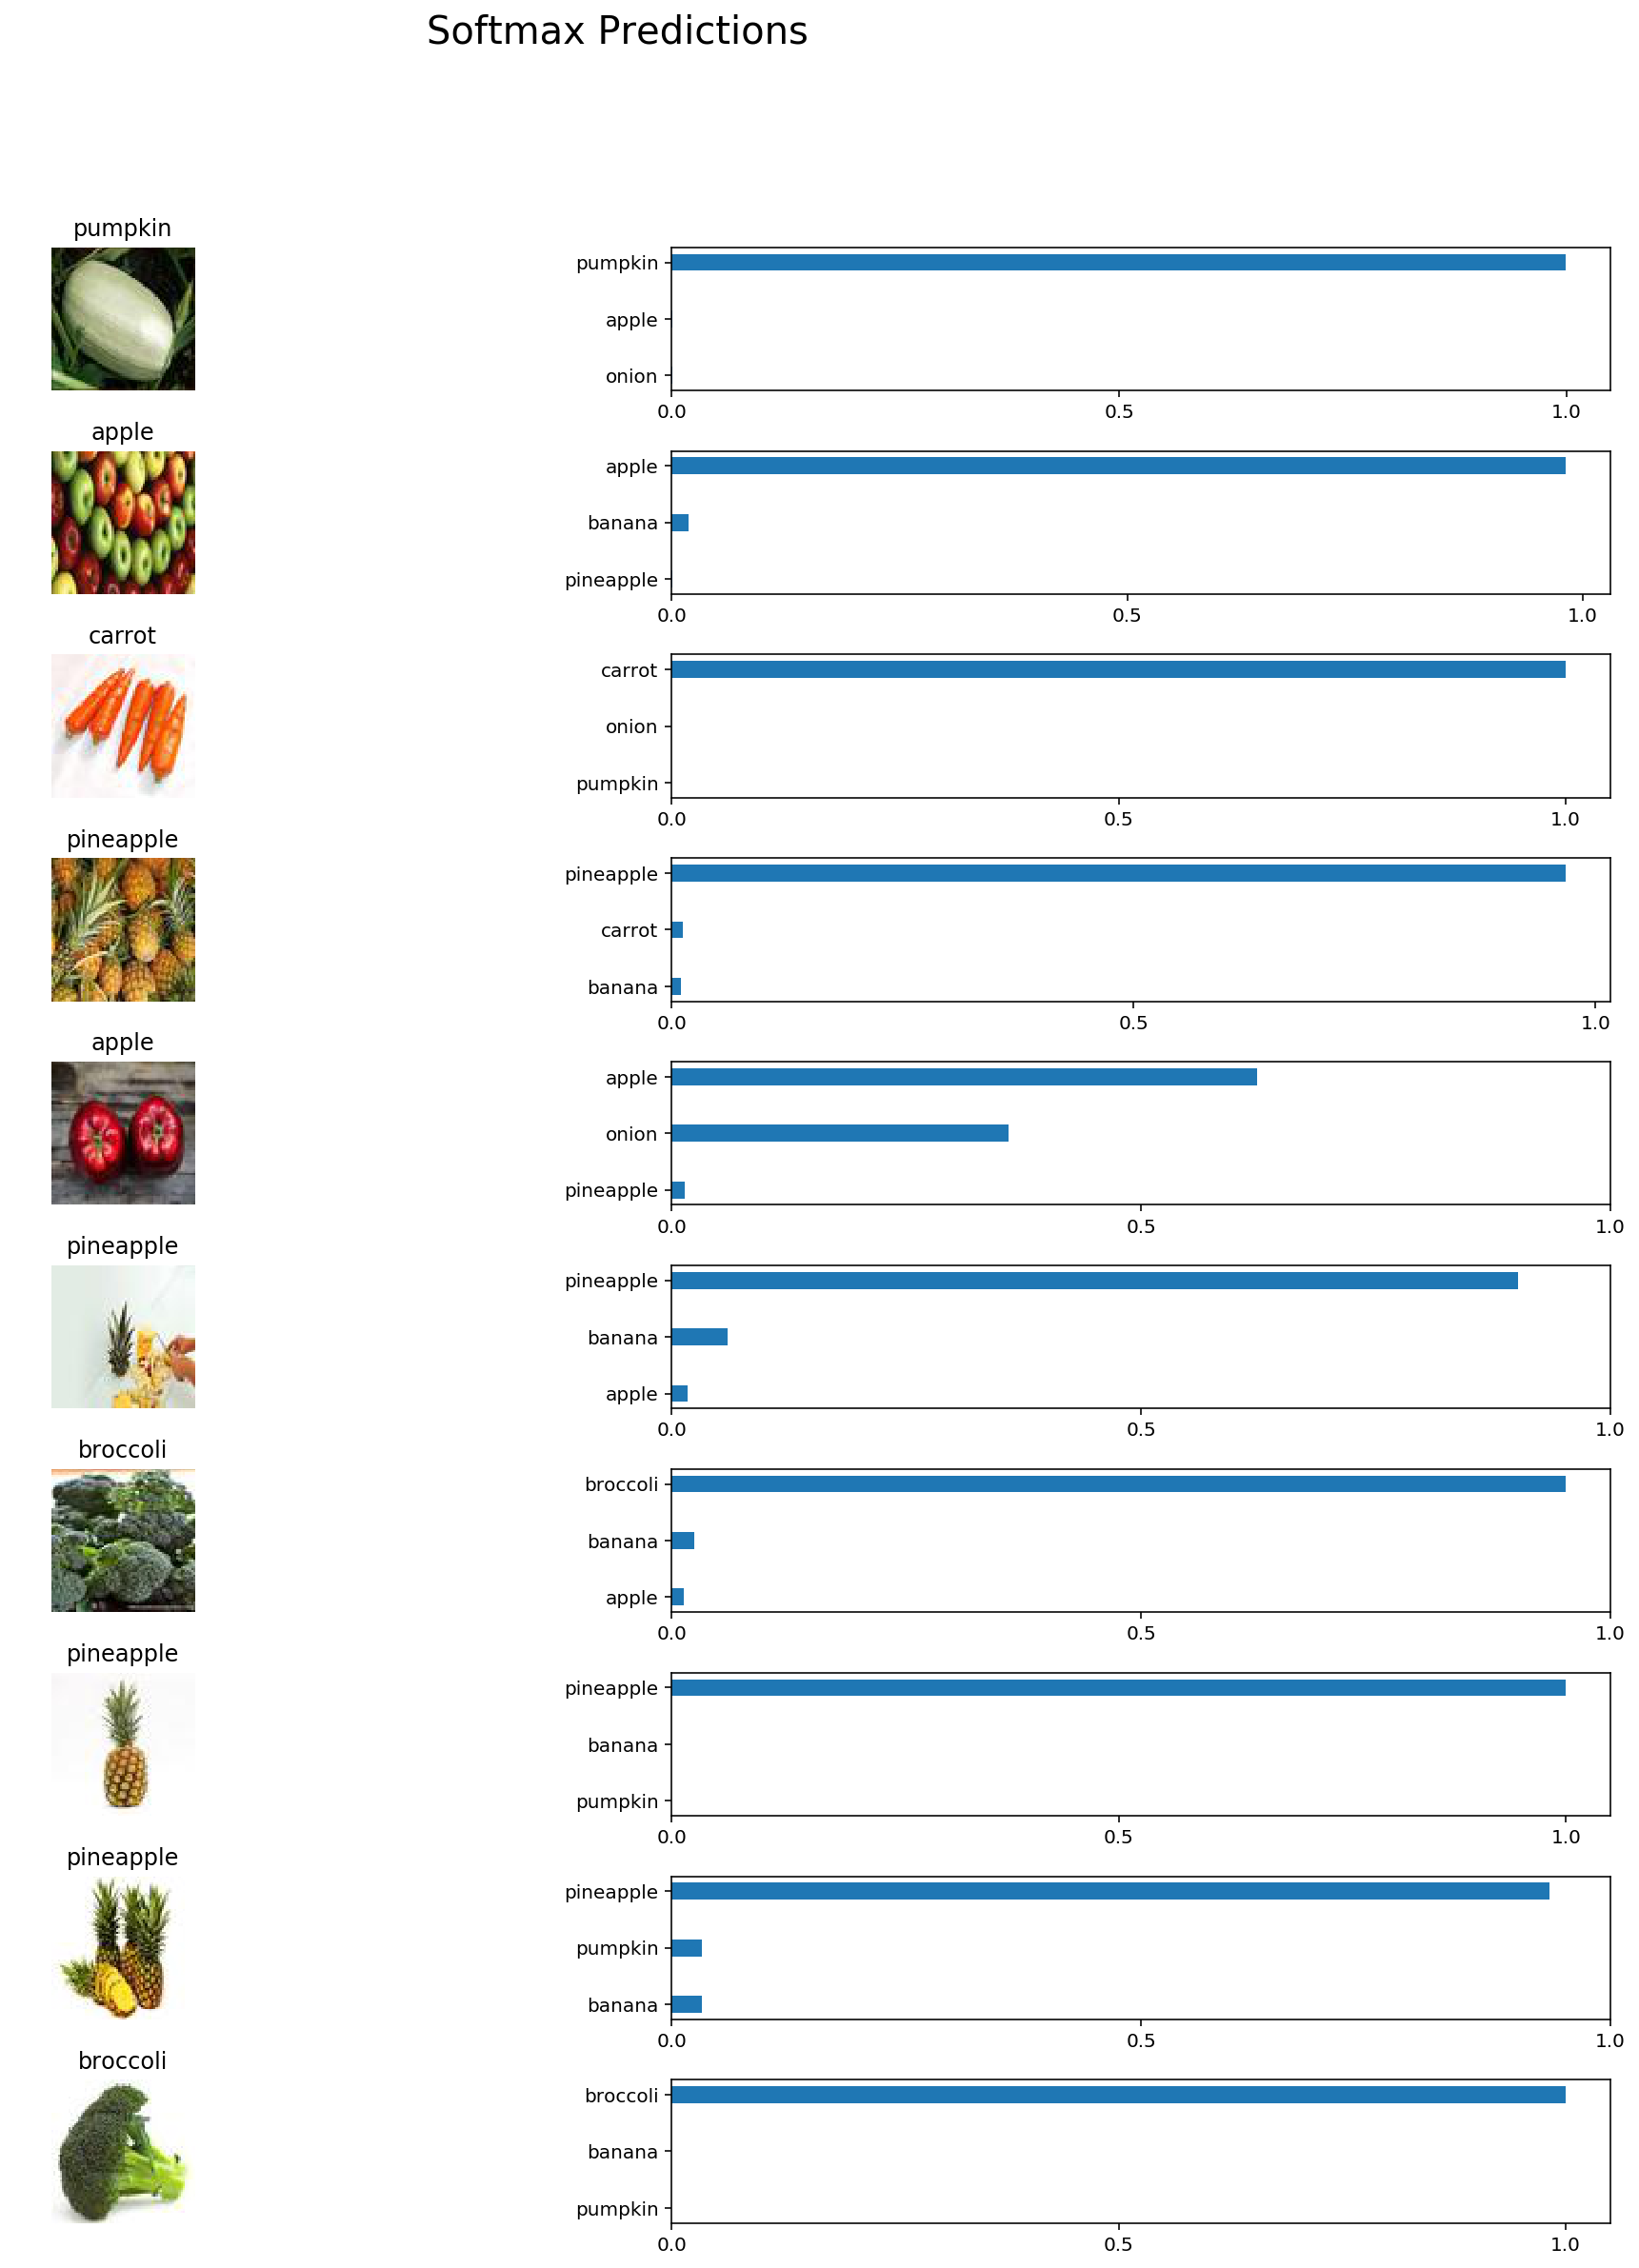

In [9]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification_07_model'
n_samples = 10
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test_model_new.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))
#         for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
#             random_test_predictions = sess.run(
#                 tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
#                 feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
#             print(random_test_predictions.values)
#             print(random_test_predictions.indices)
            #helper.display_image_predictions(test_feature_batch, test_label_batch, random_test_predictions)
        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Custom Test

In [5]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification_07_model'
n_samples = 10
top_n_predictions = 3
image_path = './test_images/'
label = []
predictions = []
def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels, filenames = pickle.load(open('preprocess_test_model_20.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
#             test_batch_acc_total += sess.run(
#                 loaded_acc,
#                 feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
#             test_batch_count += 1
            random_test_predictions = sess.run(
                tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            for i, a in enumerate(test_label_batch):
                temp_label = []
                for j in random_test_predictions.indices[i]:
                    temp_label.append(helper._load_label_name_for_id(j))
                label.append(temp_label)
                predictions.append([(float(n) * 100) for n in random_test_predictions.values[i]])
                #print('img: ',i,' result ', random_test_predictions.values[i])
            #helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)
        #print(label)
        #print(predictions)
        #print(random_test_predictions)
        for i,a in enumerate(label):
            #p = [(float(n) * 100) for n in predictions[i]]
            print('fi: ',filenames[i],' label: ',label[i], 'Pred: ',predictions[i])
        #print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
#         random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
#         print(len(random_test_labels))
#         random_test_predictions = sess.run(
#             tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
#             feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
#         helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)

helper.resize_images(image_path, './converted_test', False)
f, l, filenames = helper.convert_image_to_numpy('./converted_test')
helper.preprocess_and_save_test_data(f, l, filenames)
test_model()


New Directory created
Total files in input dir: 1
 ./converted_test/0.jpeg1


C:\Users\i318768\git\cnn-from-scratch-using-tensorflow\helper.py:298: RuntimeWarning: invalid value encountered in true_divide
  return x/np.max(x, axis=0)


INFO:tensorflow:Restoring parameters from ./image_classification_07_model
fi:  0.jpeg  label:  ['apple', 'banana', 'broccoli'] Pred:  [nan, nan, nan]


In [2]:
import helper
helper.preprocess_and_save_test_data()